In [ ]:
from sklearn import 

In [1]:
CHALLENGE = "antiviral-admet-2025"  # or: "antiviral-potency-2025"


In [2]:
import polaris as po

competition = po.load_competition(f"asap-discovery/{CHALLENGE}")

[2025-02-03 14:35:41] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=456633;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=438519;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.6).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=48013;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=298167;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [3]:
competition.cache()


Output()

[14:35:44] Copying to destination                                                                      ]8;id=511377;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=127498;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#381\381]8;;\
           /home/hmacdope/.cache/polaris/datasets/084c479d-868d-4dee-b49b-bcf45e69851f/data.zarr                   

           For large Zarr archives, this may take a while.                                             ]8;id=724477;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=506487;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#382\382]8;;\

[14:35:46]  Success: Copying Zarr keys                                                                ]8;id=697736;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=853273;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=235675;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=116313;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/hmacdope/.cache/polaris/datasets/084c479d-868d-4dee-b49b-bcf45e69851f'

In [53]:
train, test = competition.get_train_test_split()


In [54]:
train.target_cols


['MLM', 'KSOL', 'MDR1-MDCKII', 'LogD', 'HLM']

In [55]:
import datamol as dm
import pandas as pd
import seaborn as sns

In [56]:
train[0]

('COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a:16|',
 {'MLM': nan, 'KSOL': nan, 'MDR1-MDCKII': 2.0, 'LogD': 0.3, 'HLM': nan})

In [57]:
tdf = train.as_dataframe()

In [58]:
tdf

,CXSMILES,MLM,KSOL,MDR1-MDCKII,LogD,HLM
0,COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...,NaN,NaN,2.0,0.3,NaN
1,O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...,NaN,333.0,0.2,2.9,NaN
2,O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...,NaN,NaN,0.5,0.4,NaN
3,NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...,NaN,376.0,8.5,1.0,NaN
4,CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|,NaN,375.0,0.9,-0.3,NaN
...,...,...,...,...,...,...
429,CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|,63.0,NaN,NaN,NaN,25.5
430,O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl,386.0,NaN,NaN,NaN,216.0
431,NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1,NaN,NaN,NaN,2.0,NaN
432,COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1,NaN,NaN,NaN,2.9,NaN


In [59]:
tdf["LOGP"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.clogp(dm.to_mol(x)))

In [73]:
tdf["TPSA"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.tpsa(dm.to_mol(x)))

In [131]:
tdf["MW"] = tdf["CXSMILES"].apply(lambda x: dm.descriptors.mw(dm.to_mol(x)))

# MLM

<Axes: xlabel='MLM', ylabel='LOGP'>

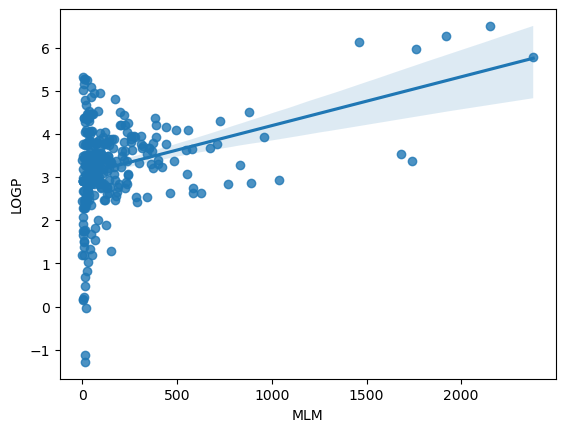

In [68]:
sns.regplot(data=tdf, x="MLM", y="LOGP")

<Axes: xlabel='MLM', ylabel='TPSA'>

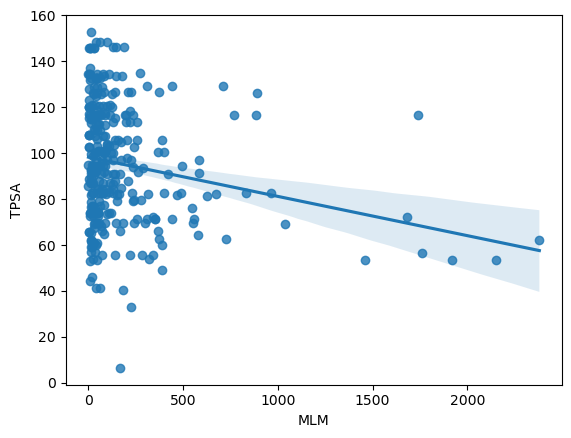

In [74]:
sns.regplot(data=tdf, x="MLM", y="TPSA")

<Axes: xlabel='MLM', ylabel='MW'>

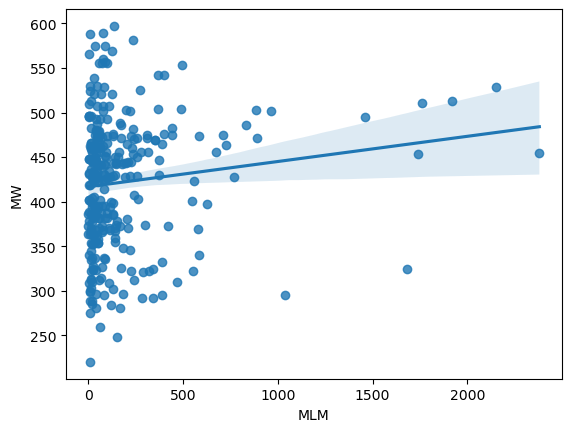

In [132]:
sns.regplot(data=tdf, x="MLM", y="MW")

# HLM

<Axes: xlabel='HLM', ylabel='LOGP'>

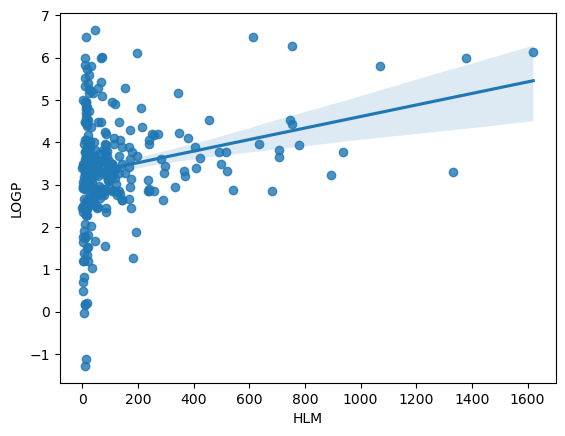

In [69]:
sns.regplot(data=tdf, x="HLM", y="LOGP")

<Axes: xlabel='HLM', ylabel='TPSA'>

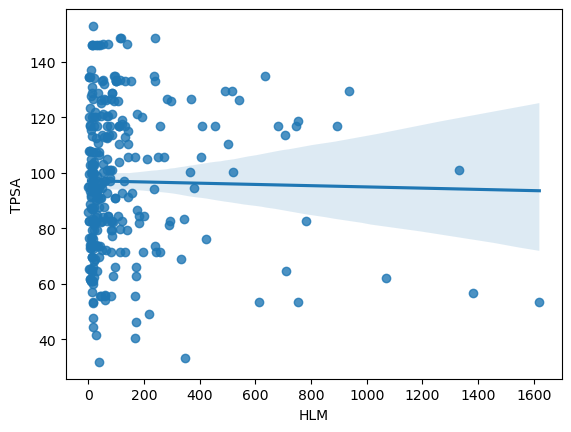

In [75]:
sns.regplot(data=tdf, x="HLM", y="TPSA")

<Axes: xlabel='HLM', ylabel='MW'>

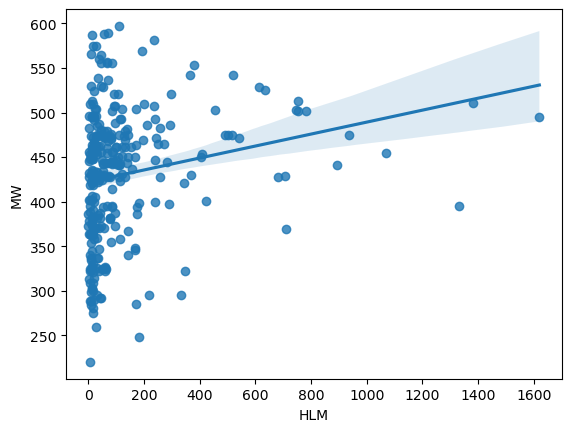

In [133]:
sns.regplot(data=tdf, x="HLM", y="MW")

# KSOL

<Axes: xlabel='KSOL', ylabel='LOGP'>

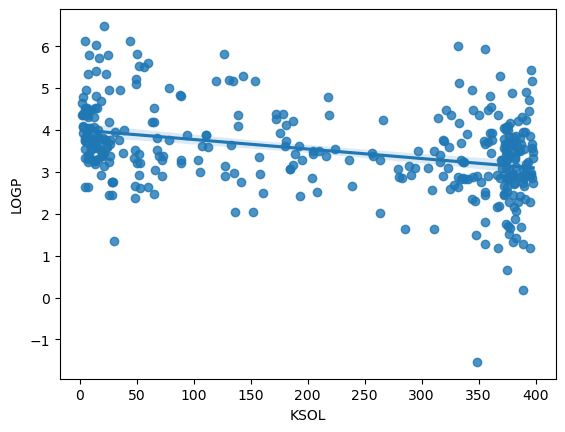

In [70]:
sns.regplot(data=tdf, x="KSOL", y="LOGP")

<Axes: xlabel='KSOL', ylabel='TPSA'>

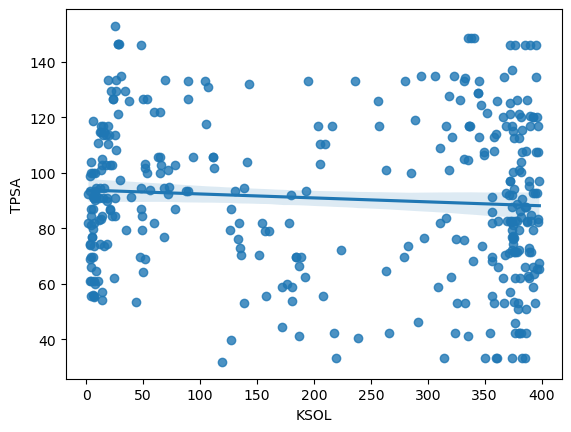

In [76]:
sns.regplot(data=tdf, x="KSOL", y="TPSA")

<Axes: xlabel='KSOL', ylabel='MW'>

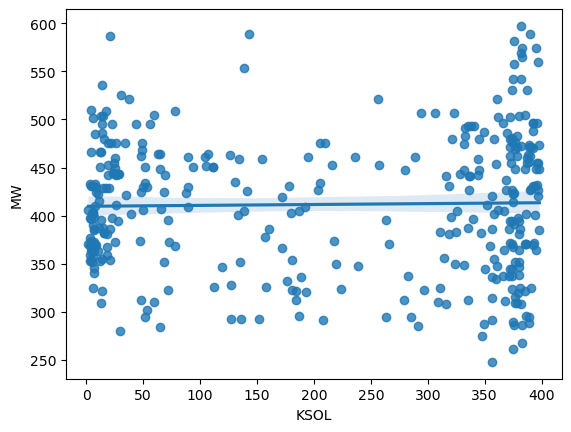

In [134]:
sns.regplot(data=tdf, x="KSOL", y="MW")

# MDCK

<Axes: xlabel='MDR1-MDCKII', ylabel='LOGP'>

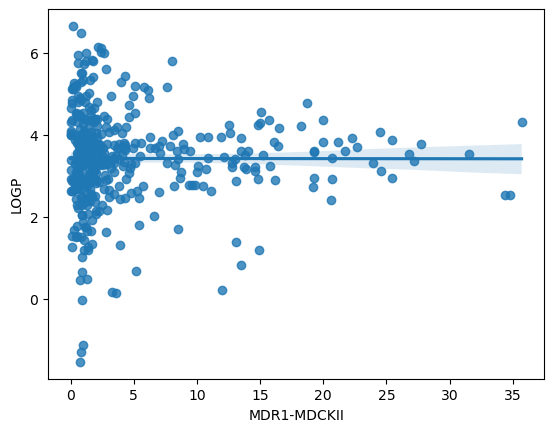

In [71]:
sns.regplot(data=tdf, x="MDR1-MDCKII", y="LOGP")

<Axes: xlabel='MDR1-MDCKII', ylabel='TPSA'>

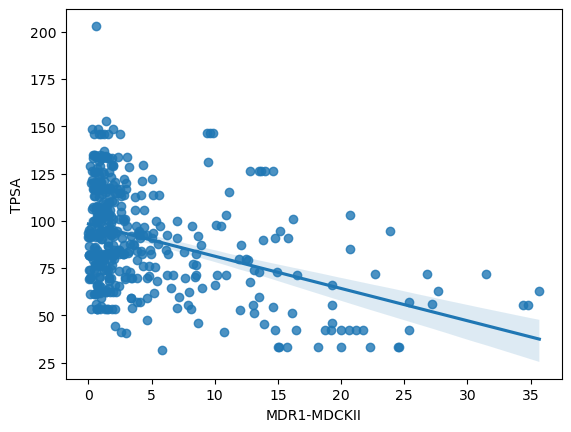

In [77]:
sns.regplot(data=tdf, x="MDR1-MDCKII", y="TPSA")

<Axes: xlabel='MDR1-MDCKII', ylabel='MW'>

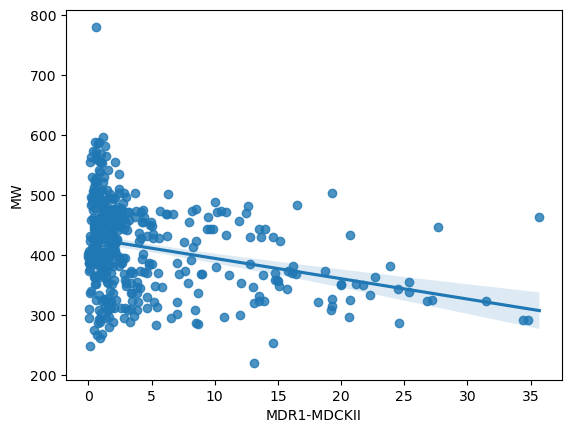

In [135]:
sns.regplot(data=tdf, x="MDR1-MDCKII", y="MW")

# LOGD

<Axes: xlabel='LogD', ylabel='LOGP'>

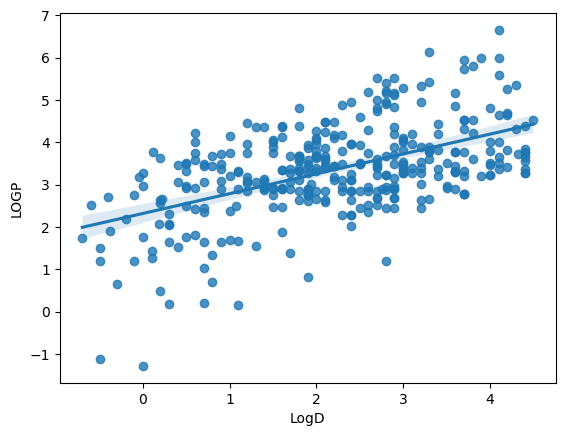

In [72]:
sns.regplot(data=tdf, x="LogD", y="LOGP")

<Axes: xlabel='LogD', ylabel='TPSA'>

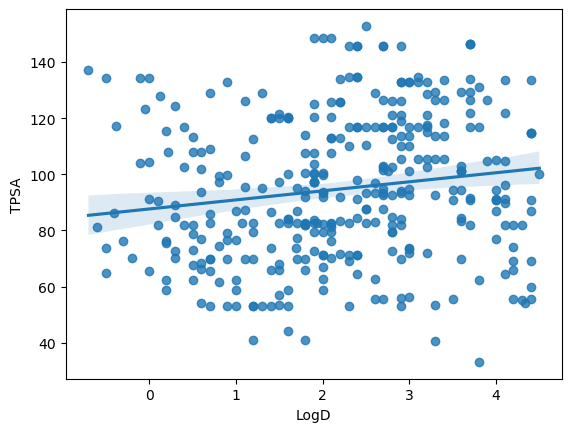

In [78]:
sns.regplot(data=tdf, x="LogD", y="TPSA")

<Axes: xlabel='LogD', ylabel='MW'>

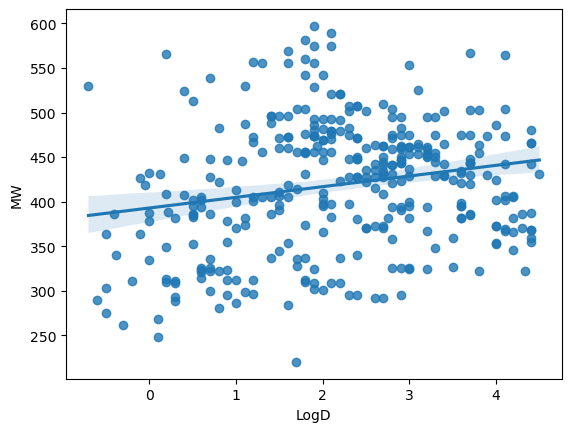

In [136]:
sns.regplot(data=tdf, x="LogD", y="MW")

In [93]:
from sklearn import linear_model
import numpy as np

# Prepare the input data. We'll use Datamol to compute the ECFP fingerprints for both the train and test columns.
X_train = np.array([dm.descriptors.clogp(dm.to_mol(smi)) for smi in train.X["CXSMILES"]]).reshape(-1, 1)
X_test = np.array([dm.descriptors.clogp(dm.to_mol(smi)) for smi in test.X]).reshape(-1, 1)

y_pred = {}

# For each of the targets...
for tgt in competition.target_cols:

    # We get the training targets
    # Note that we need to mask out NaNs since the multi-task matrix is sparse.
    y_true = train.y[tgt]
    mask = ~np.isnan(y_true)

    # We'll train a simple baseline model
    model = linear_model.LinearRegression()
    model.fit(X_train[mask], y_true[mask])

    # And then use that to predict the targets for the test set
    y_pred[tgt] = model.predict(X_test)

In [99]:
y_pred

{'MLM': array([322.84627115, 262.86713023, 288.72427956, 294.68140612,
        356.30278193, 129.41676175, 103.67982831, 230.88111736,
        112.62947177, 329.41521071, 270.3484225 , 210.93816034,
        260.34689002, 194.59094637, 369.70041323, 194.41920939,
        194.59094637, 220.99550734, 293.45133999, 236.1190953 ,
        310.63362503, 179.03801595, 220.90963885, 304.73875312,
        421.55210148, 345.07762345, 254.57008729, 110.84770059,
         84.27140264, 454.65655145,  85.15155467, 257.88675776,
         43.27993178, 254.57008729,  42.57151673,  86.05317383,
         68.97607769,  44.35328792,  27.1044548 ,  86.05317383,
         86.05317383, 126.31476252, 152.71932348,  51.81311307,
         84.91756304,  84.44313962, 296.44171019, 296.44171019,
         44.18155093, 486.49014776, 345.07762345, 194.35480802,
        168.18638541, 152.71932348,  70.75784888, 168.01464843,
         50.69682268,  86.05317383, 126.14302553,   2.48166502,
        311.97317349, 209.8862713

In [100]:
preds = pd.DataFrame(y_pred)

In [102]:
preds["split"] = "test"

In [103]:
tdf["split"] = "train"

In [106]:
combined = pd.concat([tdf, preds])

<Axes: xlabel='LogD', ylabel='Count'>

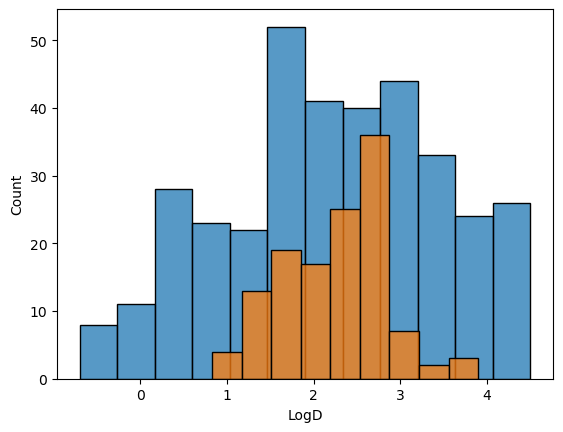

In [112]:
sns.histplot(data=tdf, x="LogD")
sns.histplot(data=preds, x="LogD")

<Axes: xlabel='MLM', ylabel='Count'>

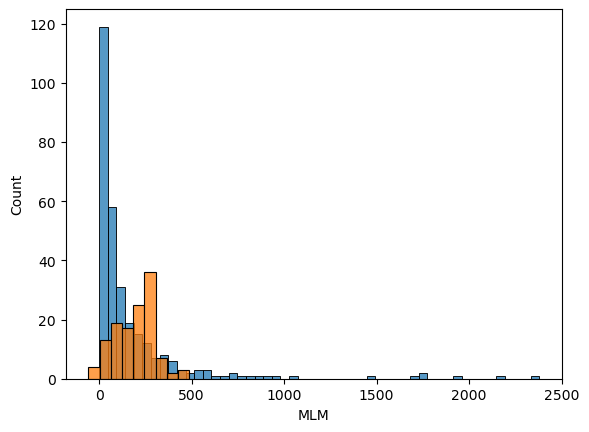

In [114]:
sns.histplot(data=tdf, x="MLM")
sns.histplot(data=preds, x="MLM")

<Axes: xlabel='HLM', ylabel='Count'>

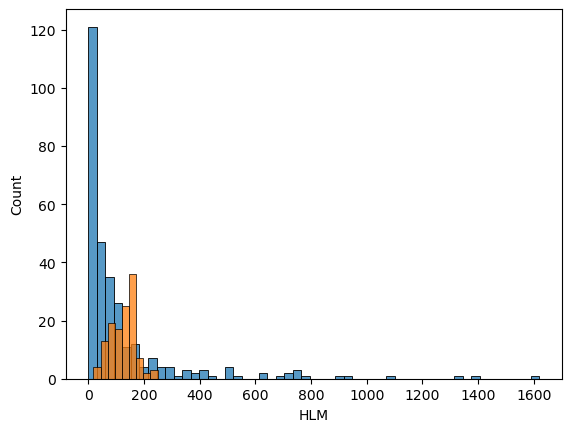

In [115]:
sns.histplot(data=tdf, x="HLM")
sns.histplot(data=preds, x="HLM")

<Axes: xlabel='KSOL', ylabel='Count'>

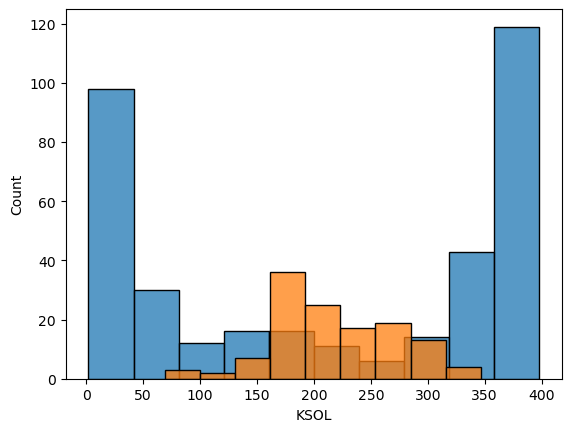

In [116]:
sns.histplot(data=tdf, x="KSOL")
sns.histplot(data=preds, x="KSOL")

<Axes: xlabel='MDR1-MDCKII', ylabel='Count'>

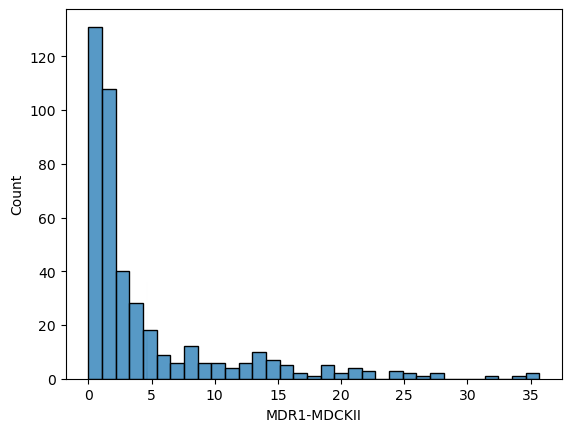

In [118]:
sns.histplot(data=tdf, x="MDR1-MDCKII")
sns.histplot(data=preds, x="MDR1-MDCKII")

In [119]:
preds

,MLM,KSOL,MDR1-MDCKII,LogD,HLM,split
0,322.846271,152.282467,4.637308,2.973807,179.127142,test
1,262.867130,182.878344,4.641641,2.635809,153.735705,test
2,288.724280,169.688389,4.639773,2.781520,164.682013,test
3,294.681406,166.649607,4.639343,2.815090,167.203890,test
4,356.302782,135.216012,4.634890,3.162343,193.290548,test
...,...,...,...,...,...,...
121,222.305002,203.569436,4.644572,2.407231,136.564223,test
122,222.305002,203.569436,4.644572,2.407231,136.564223,test
123,236.301566,196.429668,4.643561,2.486105,142.489497,test
124,244.094131,192.454613,4.642998,2.530018,145.788385,test


In [122]:
tdf["MDR1-MDCKII"].mean()

4.646605835294118

In [123]:
y_pred

{'MLM': array([322.84627115, 262.86713023, 288.72427956, 294.68140612,
        356.30278193, 129.41676175, 103.67982831, 230.88111736,
        112.62947177, 329.41521071, 270.3484225 , 210.93816034,
        260.34689002, 194.59094637, 369.70041323, 194.41920939,
        194.59094637, 220.99550734, 293.45133999, 236.1190953 ,
        310.63362503, 179.03801595, 220.90963885, 304.73875312,
        421.55210148, 345.07762345, 254.57008729, 110.84770059,
         84.27140264, 454.65655145,  85.15155467, 257.88675776,
         43.27993178, 254.57008729,  42.57151673,  86.05317383,
         68.97607769,  44.35328792,  27.1044548 ,  86.05317383,
         86.05317383, 126.31476252, 152.71932348,  51.81311307,
         84.91756304,  84.44313962, 296.44171019, 296.44171019,
         44.18155093, 486.49014776, 345.07762345, 194.35480802,
        168.18638541, 152.71932348,  70.75784888, 168.01464843,
         50.69682268,  86.05317383, 126.14302553,   2.48166502,
        311.97317349, 209.8862713

In [129]:
competition.submit_predictions(
    predictions=y_pred,
    prediction_name="asap-adme-logp-linear-baseline",
    prediction_owner="hmacdope",
    report_url="https://asapdiscovery.org", 
    # The below metadata is optional, but recommended.
    github_url="https://asapdiscovery.org",
    description="ASAPDiscovery LogP linear baseline",
    tags=["baseline"],
    user_attributes={"Framework": "Scikit-learn", "Method": "LinearRegression", }
)

[15:36:02]  Success: Submitting competition predictions                                               ]8;id=835754;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=920911;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

In [130]:
competition.submit_predictions?

Signature:
competition.submit_predictions(
    predictions: list | numpy.ndarray | dict[str, list | numpy.ndarray | dict[str, list | numpy.ndarray]],
    prediction_name: typing.Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')],
    prediction_owner: str,
    report_url: typing.Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f0d02bcaac0>, json_schema_input_type=PydanticUndefined)],
    contributors: list[typing.Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')]] | None = None,
    github_url: Optional[Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f0d02bcaac0>, json_schema_input_type=PydanticUndefined)]] = None,
    description: str = '',
    tags: list[str] | None = None,
    user_attributes: dict[str, str] | None = None,
) -> None
Docstring:
Conven